 # Machine Learning Fundamentals: Supervised & Unsupervised Learning

## Goal
This notebook demonstrates core concepts in machine learning using synthetic datasets:
- **Supervised Learning**: Classification and Regression
- **Unsupervised Learning**: Clustering
- **Evaluation Metrics**: Model performance assessment

We'll build intuition by visualizing decision boundaries, regression fits, and cluster assignments.

## Import Libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression, make_blobs
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 
,mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Generate Synthetic Datasets

In [43]:
X_reg , y_reg = make_regression(n_samples =300, n_features = 1, noise =20, random_state = 42)

X_clf, y_clf = make_classification(n_samples = 300, n_features = 2, n_informative =2, 
                                   n_redundant = 0, n_clusters_per_class=1 , random_state = 42)


X_clust, y_clust = make_blobs(n_samples = 300, n_features = 2, centers =3, random_state = 42)

In [44]:
print('Regression dataset shape:', X_reg.shape)
print('Classification dataset shape:', X_clf.shape)
print('Clustering dataset shape:', X_clust.shape)

Regression dataset shape: (300, 1)
Classification dataset shape: (300, 2)
Clustering dataset shape: (300, 2)


## Supervised Learning : Linear Regression Model

Fitting a simple linear regression model to predict the continuous target variable.

In [45]:
reg_model = LinearRegression()
reg_model.fit(X_reg, y_reg)
y_reg_pred =  reg_model.predict(X_reg)

Visualize Regression Fit

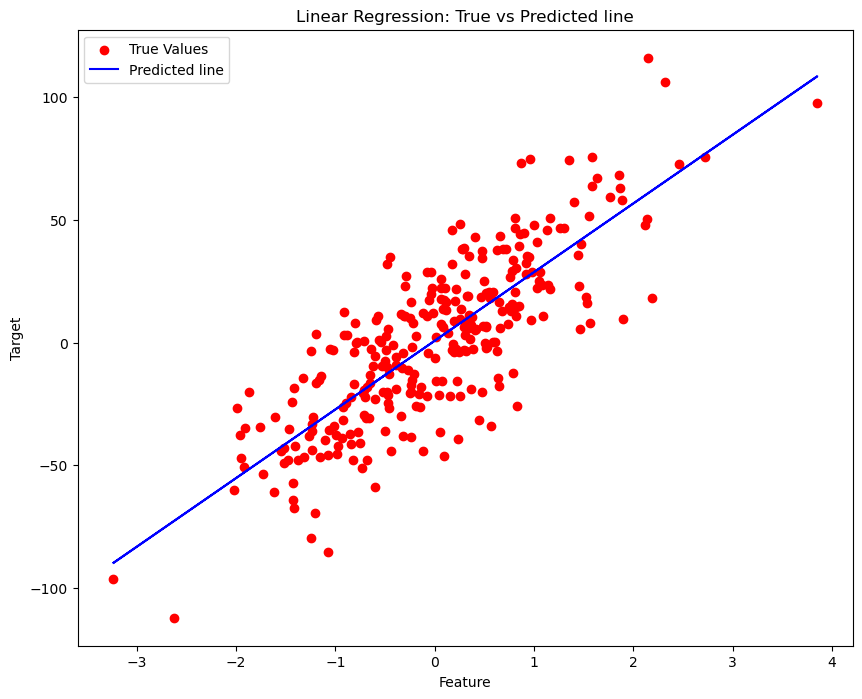

In [46]:
plt.figure(figsize=(10,8))
plt.scatter(X_reg, y_reg, color = 'red', label = 'True Values')
plt.plot(X_reg, y_reg_pred, color = 'blue' , label = 'Predicted line')
plt.title('Linear Regression: True vs Predicted line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

## Key Takeaways So Far

**Regression**: Predicts continuous values using a linear relationship  
**Visualization**: Helps understand how well the model fits the data  

## Supervised Learning: Classification - Logistic Regression

Logistic Regression is used for binary classification. It predicts the probability that a sample belongs to a particular class.


In [62]:
# Train-test split (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)
clf_model = LogisticRegression()
clf_model.fit(X_train, y_train)
y_clf_pred = clf_model.predict(X_test)

Decision Boundary Visualization:


The **decision boundary** is the line/surface that separates the two classes. 

**What you'll see:**
- **Background shading**: Shows regions where the model predicts Class 0 (one color) vs Class 1 (another color)
- **Data points**: Colored by their true labels
- **Boundary line**: Where the background colors meet - this is where the model is "uncertain" (probability ≈ 0.5)

This visualization helps us understand how the model "thinks" about the entire feature space.

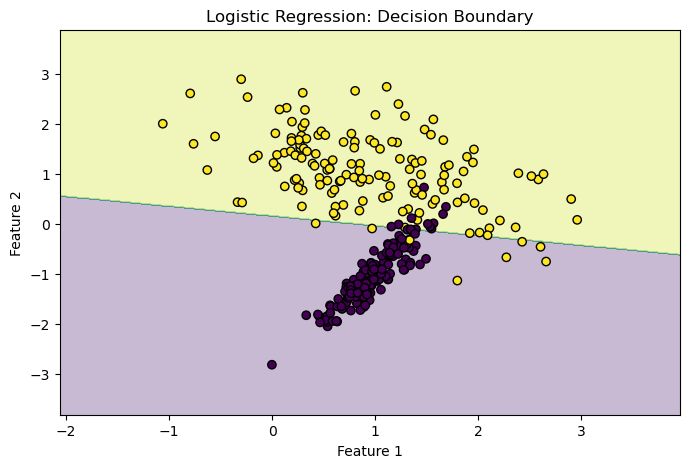

In [64]:
# Visualize decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_clf[:, 0].min() - 1, X_clf[:, 0].max() + 1
y_min, y_max = X_clf[:, 1].min() - 1, X_clf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, edgecolors='k', marker='o')
plt.title('Logistic Regression: Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Key observations:**

**Good separation**: The background regions clearly divide the feature space. 

**Correct classifications**: Most data points fall in the correct shaded region (points match the background color)  

**Clean boundary**: The transition between classes is smooth and logical  

**Model performance:**
- Points that are in the "wrong" colored region represent misclassifications
- In this plot, we can visually see that the logistic regression model achieves excellent separation with very few misclassified points
- The linear decision boundary (straight line) is sufficient because our dataset has `n_clusters_per_class=1`, making it linearly separable

This visualization confirms that our model has learned an effective decision rule to distinguish between the two classes.

## Unsupervised Learning: K-Means Clustering

**K-Means Clustering** is an unsupervised algorithm that groups similar data points together without using labels.

**How it works:**
1. Randomly initialize 3 cluster centers
2. Assign each point to the nearest center
3. Update centers based on assigned points
4. Repeat until convergence

Unlike supervised learning, we don't have "correct" labels - the algorithm discovers natural groupings in the data.

In [65]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_clust)
labels = kmeans.labels_

**Cluster Visualization:**

Each data point is colored according to its assigned cluster. The algorithm discovered these groupings purely from the feature values, without any supervision.

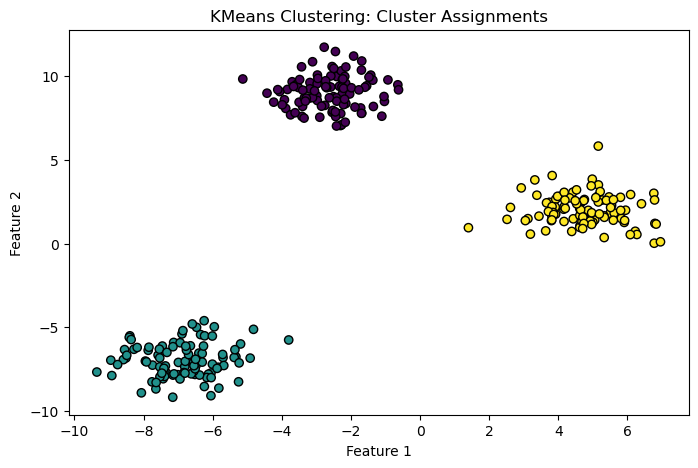

In [50]:
plt.figure(figsize=(8,5))
plt.scatter(X_clust[:, 0], X_clust[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('KMeans Clustering: Cluster Assignments')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Key observations:**

**Clear separation**: The three clusters are well-separated with no overlap  
**Natural groupings**: Points within each cluster are close to each other in feature space  
**Successful clustering**: K-Means correctly identified the 3 natural groups in our synthetic dataset  

**Unsupervised vs Supervised:**
- In clustering, we didn't provide labels during training
- The algorithm found these groups based solely on feature similarity
- Compare this to classification, where we explicitly taught the model using labeled examples

This demonstrates how unsupervised learning can discover hidden patterns and structure in unlabeled data.

## Regression Model Evaluation


## Classification Model Evaluation

After training our logistic regression model, we need to evaluate how well it performs on unseen test data. We'll calculate four key metrics:

- **Accuracy**: Overall correctness (correct predictions / total predictions)
- **Precision**: Of predicted positives, how many were actually positive?
- **Recall**: Of actual positives, how many did we catch?
- **F1-Score**: Harmonic mean of precision and recall (balances both)

In [51]:
accuracy = accuracy_score(y_test,y_clf_pred)
precision = precision_score(y_test, y_clf_pred)
recall = recall_score(y_test, y_clf_pred)
f1 = f1_score(y_test, y_clf_pred)

print(f" Accuracy is : {accuracy: .2f}")
print(f" Precision is : {precision: .2f}")
print(f" Recall is : {recall: .2f}")
print(f" F1 Score is : {f1: .2f}")

 Accuracy is :  0.96
 Precision is :  0.95
 Recall is :  0.95
 F1 Score is :  0.95


**When to prioritize each:**
- **High Accuracy**: General performance measure
- **High Precision**: When false positives are costly (e.g., spam filter - don't want to block legitimate emails)
- **High Recall**: When false negatives are costly (e.g., disease detection - don't want to miss sick patients)
- **High F1**: When you need balance between precision and recall

**ROC Curve: Visualizing Classification Performance**


The **ROC (Receiver Operating Characteristic) Curve** shows how well our classifier distinguishes between classes across all possible classification thresholds.

**Key concept:** Instead of using a fixed threshold (e.g., predict positive if probability > 0.5), we evaluate performance at many different thresholds.

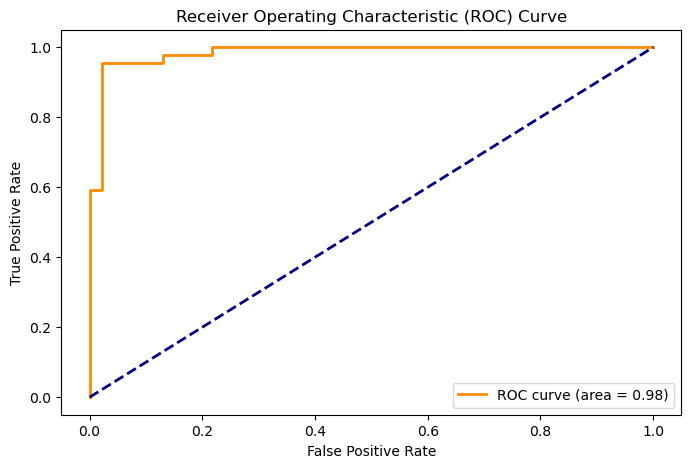

In [66]:
# ROC Curve
probs = clf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Understanding the ROC Curve**

**What the axes mean:**

- **X-axis (FPR)**: False Positive Rate = False alarms
  - How many negatives are incorrectly predicted as positive
  - Lower is better

- **Y-axis (TPR)**: True Positive Rate = Recall
  - How many actual positives are correctly identified
  - Higher is better

**What the curves mean:**

- **Orange curve**: Our model's performance
  - Shows the trade-off between catching true positives and avoiding false positives
  - Curves closer to the **top-left corner** are better

- **Navy dashed line**: Random guessing baseline
  - A coin flip would give you this diagonal line
  - Any model above this line is better than random

**AUC (Area Under Curve) Score:**

| AUC Score | Model Performance |
|-----------|------------------|
| **0.90 - 1.00** | **Excellent** ⭐⭐⭐ |
| 0.80 - 0.89 | Good ⭐⭐ |
| 0.70 - 0.79 | Fair ⭐ |
| 0.60 - 0.69 | Poor |
| 0.50 | Random (no skill) |

### 7.3 Our Model's Performance

**AUC = {:.2f}** → {0.98}

**What this means:**
- Our model can distinguish between the two classes with **very high accuracy**
- At most threshold settings, we achieve high recall (catch positives) while maintaining low false positive rate
- The curve hugging the top-left corner indicates excellent separation between classes

This confirms what we saw in the decision boundary plot - our logistic regression model performs exceptionally well on this dataset!

## Clustering Evaluation